In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

Visuallzing bouding box of adhar card

3
0
4
1
2


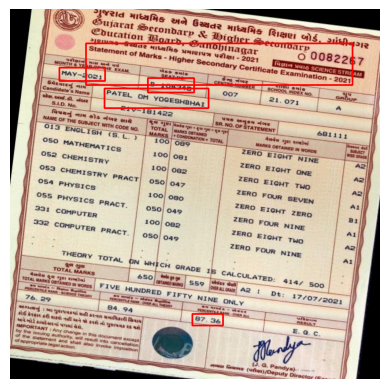

In [3]:
# Load the image
image_path = "./12th_marksheet_entity_detection.v1i.yolov11/train/images/12th_marksheet_3_jpg.rf.5daa32b41a21990ab3e938ff3370dc83.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib


# Image dimensions
img_height, img_width, _ = image.shape

label_file = "./12th_marksheet_entity_detection.v1i.yolov11/train/labels/12th_marksheet_3_jpg.rf.5daa32b41a21990ab3e938ff3370dc83.txt"

# Read the label file
with open(label_file, "r") as file:
    label = file.readlines()

for lab in label:
    lab = lab.strip().split(" ")
    class_id = int(lab[0])
    print(class_id)
    center_x = float(lab[1])
    center_y = float(lab[2])
    width = float(lab[3])
    height = float(lab[4])
    # Denormalize the coordinates
    center_x = int(center_x * img_width)
    center_y = int(center_y * img_height)
    width = int(width * img_width)
    height = int(height * img_height)

    # Calculate top-left and bottom-right corners of the bounding box
    x1 = int(center_x - width / 2)
    y1 = int(center_y - height / 2)
    x2 = int(center_x + width / 2)
    y2 = int(center_y + height / 2)

    # Draw the bounding box on the image
    cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

# Display the image with the bounding box
plt.imshow(image)
plt.axis("off")
plt.show()

Transfering only 420 files out of 1240 files in the source dataset

In [24]:
import os
import shutil
import random

# Define source and destination paths
source_path = "./OCR_pan_card/train/images"
destination_path_image = "./datasetOCR/train/images"
destination_path_label = "./datasetOCR/train/labels"


# Create destination directory if it doesn't exist
os.makedirs(destination_path_image, exist_ok=True)

# Get list of all files in the source directory
all_files = os.listdir(source_path)

# Select 420 files at random
selected_files = random.sample(all_files, 420)


# Copy selected files to the destination directory
for file_name in selected_files:
    label_file = file_name.replace(".jpg", ".txt")
    full_label_file = os.path.join(source_path, label_file)
    full_label_file = full_label_file.replace("images", "labels")
    full_file_name = os.path.join(source_path, file_name)

    with open(full_label_file, "r") as file:
        lines = file.readlines()

    normalized_lines = []
    
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        if class_id == 0:
            class_id = "8"
        elif class_id == 1:
            class_id = "9"
        elif class_id == 2:
            class_id = "10"
        elif class_id == 3:
            class_id = "11"
        
        normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n" 
        normalized_lines.append(normalized_line)

    if normalized_lines:
        print(normalized_lines)
        with open(full_label_file, 'w') as label_file:
            label_file.writelines(normalized_lines)
    
    shutil.copy(full_file_name, destination_path_image)
    shutil.copy(full_label_file, destination_path_label)




['10 0.576305 0.268219 0.427041 0.066802\n', '11 0.550201 0.149798 0.227577 0.060729\n', '9 0.617135 0.462551 0.503347 0.046559\n', '8 0.443775 0.688259 0.159304 0.048583\n']
['8 0.153055 0.700086 0.094374 0.016674\n', '9 0.179371 0.637452 0.128857 0.017101\n', '10 0.169087 0.588499 0.111918 0.014964\n', '11 0.430127 0.539333 0.169389 0.021804\n']
['10 0.288264 0.413638 0.297036 0.021804\n', '9 0.277979 0.444848 0.276467 0.020949\n', '8 0.203569 0.482044 0.139746 0.020949\n', '11 0.232910 0.557931 0.197217 0.022232\n']
['10 0.193133 0.313212 0.297568 0.061503\n', '9 0.187411 0.447608 0.288984 0.047836\n', '8 0.133047 0.580866 0.171674 0.063781\n', '11 0.170243 0.727790 0.246066 0.070615\n']
['8 0.205082 0.634245 0.148820 0.019239\n', '9 0.179976 0.574605 0.107078 0.017956\n', '10 0.232002 0.514750 0.208711 0.016246\n', '11 0.519359 0.461522 0.223230 0.019239\n']
['10 0.354809 0.246687 0.131276 0.008551\n', '9 0.340593 0.264215 0.096794 0.011971\n', '8 0.326679 0.289867 0.068966 0.00684

In [25]:
source_path = "./OCR_pan_card/train/images"
# Create destination directory if it doesn't exist
os.makedirs(destination_path_image, exist_ok=True)

# Get list of all files in the source directory
all_files = os.listdir(source_path)
destination_path_image_val = "./datasetOCR/val/images"
destination_path_label_val = "./datasetOCR/val/labels"
selected_files = random.sample(all_files, 50)

# Copy selected files to the destination directory
for file_name in selected_files:
    label_file = file_name.replace(".jpg", ".txt")
    full_label_file = os.path.join(source_path, label_file)
    full_label_file = full_label_file.replace("images", "labels")
    full_file_name = os.path.join(source_path, file_name)
    
    with open(full_label_file, "r") as file:
        lines = file.readlines()

    normalized_lines = []
    
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        if class_id == 0:
            class_id = "8"
        elif class_id == 1:
            class_id = "9"
        elif class_id == 2:
            class_id = "10"
        elif class_id == 3:
            class_id = "11"
        
        normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n" 
        normalized_lines.append(normalized_line)

    if normalized_lines:
        print(normalized_lines)
        with open(full_label_file, 'w') as label_file:
            label_file.writelines(normalized_lines)

    shutil.copy(full_file_name, destination_path_image_val)
    shutil.copy(full_label_file, destination_path_label_val)

['11 0.439077 0.498790 0.223172 0.045372\n', '10 0.207781 0.646400 0.190680 0.030853\n', '9 0.194528 0.737750 0.161608 0.030853\n', '8 0.174006 0.862069 0.108593 0.029038\n']
['11 0.260067 0.740299 0.147651 0.029851\n', '8 0.239094 0.638806 0.109060 0.029851\n', '9 0.313758 0.565672 0.258389 0.032836\n', '10 0.303691 0.511940 0.234899 0.032836\n']
['10 0.175131 0.236765 0.279070 0.048824\n', '9 0.275273 0.354118 0.472710 0.050588\n', '8 0.149027 0.451471 0.217371 0.048824\n', '11 0.164452 0.575294 0.263408 0.044706\n']
['11 0.483754 0.468845 0.181702 0.041137\n', '10 0.273407 0.555354 0.244976 0.035088\n', '9 0.263788 0.644888 0.225737 0.030248\n', '8 0.207354 0.751966 0.122274 0.039927\n']
['10 0.175131 0.236765 0.279070 0.048824\n', '9 0.275273 0.354118 0.472710 0.050588\n', '8 0.149027 0.451471 0.217371 0.048824\n', '11 0.164452 0.575294 0.263408 0.044706\n']
['10 0.138232 0.328918 0.119552 0.048565\n', '10 0.237235 0.410596 0.317559 0.057395\n', '10 0.146326 0.506623 0.140722 0.050

In [26]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Display model information (optional)
model.info()


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [27]:
result = model.train(data = "./data_documnet_OCR.yaml" , epochs = 1 ,augment=True,  val=True )

New https://pypi.org/project/ultralytics/8.3.72 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./data_documnet_OCR.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train29, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

train: Scanning D:\Elecon\HRMS_Document_validation\datasetOCR\train\labels... 840 images, 0 backgrounds, 0 corrupt: 100%|██████████| 840/840 [00:00<00:00, 1324.78it/s]


train: New cache created: D:\Elecon\HRMS_Document_validation\datasetOCR\train\labels.cache


val: Scanning D:\Elecon\HRMS_Document_validation\datasetOCR\val\labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1173.15it/s]

val: New cache created: D:\Elecon\HRMS_Document_validation\datasetOCR\val\labels.cache


Plotting labels to runs\detect\train29\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train29
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.829      3.847      1.457         46        640: 100%|██████████| 53/53 [04:49<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.47s/it]


                   all         90        374     0.0243      0.429      0.178       0.12

1 epochs completed in 0.084 hours.
Optimizer stripped from runs\detect\train29\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train29\weights\best.pt, 6.2MB

Validating runs\detect\train29\weights\best.pt...
Ultralytics 8.3.65  Python-3.9.21 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.22s/it]


                   all         90        374          1     0.0833      0.265      0.159
          AadharNumber         40         40      0.998          1      0.995      0.835
           AdharAdress         15         15          1          0      0.889      0.377
             AdharCity         15         15          1          0      0.117     0.0463
              AdharDOB         25         25          1          0      0.148     0.0581
           AdharGender         25         25          1          0          0          0
             AdharName         25         25          1          0     0.0127    0.00651
          AdharPincode         15         15          1          0      0.396      0.201
          AhadharState         15         15          1          0          0          0
                PanDOB         33         33          1          0      0.135     0.0774
             PanFather         33         33          1          0     0.0214     0.0134
               PanNam

In [1]:
import sys
print(sys.version)


3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]


we have just added one new dataset named new_aadhar_card_Dataset which include more variation so model can learn more nicely. here the code we are writing is to oragnize dataset 


this is for training data


In [41]:
images_list = []
lables_list = []
flag = 0
counter = 0

for label_file in os.listdir("./new_aadhar_card_ocr/train/labels"):
    flag = 0 
    with open(os.path.join("./new_aadhar_card_ocr/train/labels", label_file), "r") as file:
        lines = file.readlines()
        for line in lines:
            if line[0] in ["0" , "1" , "2" , "3"]:
                flag = 1
            else:
                flag = 0
                counter += 1
                break
        if flag == 1:
            lables_list.append("./new_aadhar_card_ocr/train/labels/"+ label_file)
            images_list.append("./new_aadhar_card_ocr/train/images/"+  label_file.replace(".txt", ".jpg"))
print(counter)

64


In [ ]:
destination_path_image = "./NewDatasetOCR/train/images"
destination_path_label = "./NewDatasetOCR/train/labels"


for i in range(0 , len(images_list)):
    
    shutil.copy(images_list[i], destination_path_image)
    shutil.copy(lables_list[i], destination_path_label)

this is for valid data

In [46]:
images_list = []
lables_list = []
flag = 0
counter = 0

for label_file in os.listdir("./new_aadhar_card_ocr/valid/labels"):
    flag = 0 
    with open(os.path.join("./new_aadhar_card_ocr/valid/labels", label_file), "r") as file:
        lines = file.readlines()
        for line in lines:
            if line[0] in ["0" , "1" , "2" , "3"]:
                flag = 1
            else:
                flag = 0
                counter += 1
                break
        if flag == 1:
            lables_list.append("./new_aadhar_card_ocr/valid/labels/"+ label_file)
            images_list.append("./new_aadhar_card_ocr/valid/images/"+  label_file.replace(".txt", ".jpg"))
print(counter)

12


In [47]:
destination_path_image = "./NewDatasetOCR/valid/images"
destination_path_label = "./NewDatasetOCR/valid/labels"


for i in range(0 , len(images_list)):
    shutil.copy(images_list[i], destination_path_image)
    shutil.copy(lables_list[i], destination_path_label)

Adding new aadhar card data

In [4]:
for images in os.listdir("./ADHAAR_CARD.v1i.yolov11/temp/images"):
    label_file = images.replace(".jpg", ".txt")
    full_label_file = os.path.join("./ADHAAR_CARD.v1i.yolov11/train/labels", label_file)
    if os.path.exists(full_label_file):
        shutil.copy(full_label_file, "./ADHAAR_CARD.v1i.yolov11/temp/labels")

In [6]:
for label in os.listdir("./ADHAAR_CARD.v1i.yolov11/temp/labels"):
    with open("./ADHAAR_CARD.v1i.yolov11/temp/labels/"+label, "r") as file:
        lines = file.readlines()

    normalized_lines = []
    
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        class_id = "0"
        
        normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n" 
        normalized_lines.append(normalized_line)

    if normalized_lines:
        print(normalized_lines)
        with open("./ADHAAR_CARD.v1i.yolov11/temp/labels/"+label, 'w') as label_file:
            label_file.writelines(normalized_lines)


['0 0.424219 0.388281 0.282813 0.150781\n', '0 0.611719 0.517969 0.275781 0.060937\n', '0 0.485156 0.785156 0.407813 0.095312\n', '0 0.332031 0.584375 0.102344 0.078906\n']
['0 0.382031 0.391406 0.228125 0.150000\n', '0 0.614844 0.511719 0.289062 0.056250\n', '0 0.331250 0.583594 0.106250 0.077344\n', '0 0.492188 0.785937 0.432031 0.092969\n']
['0 0.424219 0.388281 0.282813 0.150781\n', '0 0.611719 0.517969 0.275781 0.060937\n', '0 0.485156 0.785156 0.407813 0.095312\n', '0 0.332031 0.584375 0.102344 0.078906\n']
['0 0.424219 0.388281 0.282813 0.150781\n', '0 0.611719 0.517969 0.275781 0.060937\n', '0 0.485156 0.785156 0.407813 0.095312\n', '0 0.332031 0.584375 0.102344 0.078906\n']
['0 0.387500 0.392969 0.216406 0.146094\n', '0 0.618750 0.516406 0.292187 0.087500\n', '0 0.335156 0.578906 0.109375 0.083594\n', '0 0.485156 0.789844 0.403125 0.085938\n']
['0 0.405469 0.376563 0.235937 0.178125\n', '0 0.614844 0.535156 0.301563 0.132812\n', '0 0.325000 0.552344 0.121875 0.100000\n', '0 0.

In [8]:
for label in os.listdir("./ADHAAR_CARD.v1i.yolov11/front_temp/labels"):
    with open("./ADHAAR_CARD.v1i.yolov11/front_temp/labels/"+label, "r") as file:
        lines = file.readlines()

    normalized_lines = []
    
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        class_id = "0"
        
        normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n" 
        normalized_lines.append(normalized_line)

    if normalized_lines:
        print(normalized_lines)
        with open("./ADHAAR_CARD.v1i.yolov11/front_temp/labels/"+label, 'w') as label_file:
            label_file.writelines(normalized_lines)

['0 0.391429 0.330000 0.223810 0.051429\n', '0 0.432381 0.392857 0.154286 0.051429\n', '0 0.317143 0.461429 0.069524 0.047857\n', '0 0.498095 0.752143 0.428571 0.092143\n']
['0 0.612381 0.331429 0.224762 0.054286\n', '0 0.570476 0.393571 0.156190 0.052857\n', '0 0.683810 0.463571 0.070476 0.048571\n', '0 0.496190 0.752143 0.430476 0.097143\n']
['0 0.608571 0.330000 0.224762 0.051429\n', '0 0.567619 0.392857 0.154286 0.051429\n', '0 0.682857 0.461429 0.068571 0.048571\n', '0 0.501905 0.752143 0.428571 0.091429\n']
['0 0.408571 0.332857 0.243810 0.062857\n', '0 0.661905 0.396429 0.182857 0.058571\n', '0 0.465714 0.462857 0.123810 0.054286\n', '0 0.495238 0.755714 0.428571 0.085714\n']
['0 0.408571 0.332857 0.243810 0.063571\n', '0 0.661905 0.396429 0.183810 0.058571\n', '0 0.465714 0.462857 0.123810 0.053571\n', '0 0.495238 0.755714 0.428571 0.085000\n']
['0 0.408571 0.332857 0.243810 0.062857\n', '0 0.661905 0.396429 0.182857 0.058571\n', '0 0.465714 0.462857 0.123810 0.054286\n', '0 0.

In [7]:
for label in os.listdir("./ADHAAR_CARD.v1i.yolov11/validation_temo/labels"):
    with open("./ADHAAR_CARD.v1i.yolov11/validation_temo/labels/"+label, "r") as file:
        lines = file.readlines()

    normalized_lines = []
    
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        class_id = "1"
        
        normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n" 
        normalized_lines.append(normalized_line)

    if normalized_lines:
        print(normalized_lines)
        with open("./ADHAAR_CARD.v1i.yolov11/validation_temo/labels/"+label, 'w') as label_file:
            label_file.writelines(normalized_lines)

['1 0.483659 0.591449 0.805476 0.254039\n']
['1 0.516430 0.503300 0.927180 0.757293\n']
['1 0.499470 0.516991 0.913520 0.876874\n']
['1 0.504288 0.509711 0.991423 0.980577\n']
['1 0.504049 0.497535 0.895400 0.812299\n']
['1 0.491771 0.485392 0.852375 0.800969\n']
['1 0.498944 0.428014 0.560962 0.252428\n']
['1 0.500047 0.522616 0.917127 0.794501\n']
['1 0.469741 0.492683 0.726152 0.656957\n']
['1 0.500620 0.508055 0.906832 0.800974\n']
['1 0.500276 0.503673 0.999447 0.992653\n']
['1 0.517894 0.496793 0.410435 0.194177\n']
['1 0.490587 0.536593 0.503025 0.694296\n']
['1 0.497820 0.563131 0.995640 0.844659\n']
['1 0.482301 0.457744 0.964601 0.879386\n']
['1 0.394644 0.758510 0.715712 0.335309\n']
['1 0.444248 0.510218 0.594874 0.526945\n']
['1 0.474912 0.547753 0.709776 0.317148\n']
['1 0.479771 0.448683 0.946681 0.372967\n']
['1 0.491334 0.519893 0.981258 0.960214\n']
['1 0.502283 0.484558 0.812510 0.749359\n']
['1 0.471870 0.512043 0.732040 0.817798\n']
['1 0.500987 0.500069 0.992169 0

In [2]:
import os
import shutil
import random

# Define source and destination paths
source_path = "./ResultDataset/train/labels"
destination_path_image = "./ResultDataset/train/images"


# Copy selected files to the destination directory
for label_files in os.listdir(source_path):
    file_name = label_files.replace(".txt", ".jpg")
    full_label_file = os.path.join("./ResultDataset/train/", file_name)
    
    shutil.copy(full_label_file, destination_path_image)




In [10]:
import os
import shutil
import random

# Define source and destination paths
source_path = "./12th_marksheet_entity_detection.v1i.yolov11/train/new"
destination_path = "./12th_marksheet_entity_detection.v1i.yolov11/train/labels"

# Copy selected files to the destination directory
for label_file in os.listdir(source_path):
    full_label_file = os.path.join(source_path, label_file)

    with open(full_label_file, "r") as file:
        lines = file.readlines()

    normalized_lines = []
    
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        if class_id == 4:
            class_id = "3"  # Skip class_id 3

        
        normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n" 
        normalized_lines.append(normalized_line)

    if normalized_lines:
        print(normalized_lines)
        with open(full_label_file, 'w') as label_file:
            label_file.writelines(normalized_lines)
    
    shutil.copy(full_label_file, destination_path)




['0 0.244531 0.167969 0.115625 0.051562\n', '3 0.463281 0.218750 0.104688 0.040625\n', '1 0.472656 0.250000 0.321875 0.085938\n', '2 0.534375 0.758594 0.085938 0.039062\n']
['0 0.227344 0.181250 0.115625 0.046875\n', '3 0.448437 0.221094 0.103125 0.035937\n', '1 0.459375 0.251563 0.321875 0.068750\n', '2 0.547656 0.756250 0.085938 0.034375\n']
['0 0.190625 0.217188 0.111719 0.032813\n', '3 0.414844 0.229687 0.101562 0.023438\n', '1 0.429688 0.258594 0.321094 0.030469\n', '2 0.578906 0.748437 0.083594 0.025000\n']
['0 0.175781 0.204687 0.123438 0.031250\n', '3 0.413281 0.223438 0.125000 0.032813\n', '1 0.414062 0.256250 0.321875 0.045312\n', '2 0.541406 0.783594 0.084375 0.029687\n']
['0 0.156250 0.228125 0.122656 0.022656\n', '3 0.394531 0.230469 0.123438 0.024219\n', '1 0.396875 0.262500 0.321094 0.023438\n', '2 0.560937 0.779687 0.082812 0.023438\n']
['0 0.156250 0.228125 0.121875 0.021875\n', '3 0.394531 0.230469 0.123438 0.025000\n', '1 0.396875 0.262500 0.321875 0.023438\n', '2 0.

In [3]:
import os
import shutil
import random

# Define source and destination paths
source_path = "./ResultDataset/val/labels"

# Copy selected files to the destination directory
for label_file in os.listdir(source_path):
    full_label_file = os.path.join(source_path, label_file)

    with open(full_label_file, "r") as file:
        lines = file.readlines()

    normalized_lines = []
    
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        if class_id == 0:
            class_id = "3"  # Skip class_id 3
        if class_id == 1:
            class_id = "4"

        
        normalized_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n" 
        normalized_lines.append(normalized_line)

    if normalized_lines:
        print(normalized_lines)
        with open(full_label_file, 'w') as label_file:
            label_file.writelines(normalized_lines)





['3 0.495492 0.498430 0.990984 0.980578\n']
['3 0.503281 0.500859 0.991906 0.995156\n']
['3 0.506523 0.496000 0.959547 0.991906\n']
['3 0.500055 0.486297 0.930422 0.852750\n']
['3 0.489047 0.482836 0.902906 0.867953\n']
['3 0.517203 0.415859 0.947563 0.714531\n']
['3 0.502641 0.489625 0.957281 0.885438\n']
['3 0.492391 0.501711 0.964656 0.978641\n']
['3 0.491961 0.495195 0.959547 0.974109\n']
['3 0.500859 0.520609 0.957938 0.927844\n']
['3 0.521281 0.501664 0.943688 0.947578\n']
['3 0.508656 0.486141 0.941750 0.943688\n']
['3 0.499883 0.493883 0.935859 0.947547\n']
['3 0.495938 0.494875 0.943875 0.957281\n']
['3 0.470602 0.489047 0.753391 0.770875\n']
['3 0.471570 0.485164 0.774766 0.732047\n']
['3 0.530789 0.463641 0.820391 0.784781\n']
['3 0.499102 0.495492 0.924422 0.926828\n']
['3 0.501703 0.468859 0.927375 0.922719\n']
['3 0.490992 0.499094 0.903141 0.928312\n']
['4 0.490320 0.474992 0.917516 0.862516\n']
['4 0.501664 0.490344 0.907766 0.906156\n']
['4 0.496008 0.487914 0.938516 0